In [5]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
import seaborn as sns
import umap

In [6]:
# load dataset into Pandas DataFrame
df = pd.read_csv('covid-selected-data.csv',index_col=0)
label = pd.read_csv('covid-selected-data-labels.csv', index_col=0)

In [3]:
df[:5]

,SLPI,SCGB1A1,SCGB3A1,IGLV3-19,IGHV4-34,WFDC2,BPIFB1,IGHG1,GNLY,MSMB,...,AL121748.1,AC091271.1,TMPRSS11A,GPR42,MAATS1,RNASE6,CLLU1OS,AL138781.1,KIR3DX1,BX284668.6
AAACCTGAGACACTAA_1-0,-0.299600,-0.209672,-0.303414,-0.124916,-0.029675,-0.173679,-0.245457,-0.045119,-0.232438,-0.245367,...,-0.002161,-0.278853,-0.049338,-0.067806,0.014586,3.340670,0.013455,-0.063450,-0.044314,0.356231
AAACCTGAGGATATAC_1-0,-0.174449,-0.188095,-0.307278,-0.030387,0.127351,-0.167250,-0.202737,-0.146072,-0.312133,-0.219180,...,-0.023173,-0.134107,-0.049219,-0.005433,-0.122310,-0.561601,-4.031731,-0.152772,-0.077827,-0.037313
AAACCTGAGGTCATCT_1-0,-0.250839,0.001586,-0.158335,-0.127563,-0.286497,-0.231720,-0.295893,-0.014139,-0.198845,-0.384431,...,-0.049942,0.061155,-0.049338,-0.032648,-0.053740,-0.001551,0.046797,-0.031315,-0.116844,0.011145
AAACGGGAGCTACCTA_1-0,-0.185059,-0.212178,-0.297900,0.145107,0.185361,-0.150315,-0.121878,-0.004044,-0.301263,-0.145767,...,-0.021301,-0.128485,-0.049338,-0.045541,-0.105046,-0.603013,-0.060725,-0.093516,0.448147,-0.053735
AAACGGGAGGAATTAC_1-0,-0.225948,-0.124393,-0.150766,-0.106845,0.062172,-0.144326,-0.135881,-0.112006,-0.284480,-0.156938,...,-0.034778,-0.134924,-0.061330,0.373200,-0.112133,-0.678061,0.027075,-0.127998,-0.095437,-0.039752


In [7]:
label[:5]

,type
AAACCTGAGACACTAA_1-0,Normal
AAACCTGAGGATATAC_1-0,Normal
AAACCTGAGGTCATCT_1-0,Normal
AAACGGGAGCTACCTA_1-0,Normal
AAACGGGAGGAATTAC_1-0,Normal


In [2]:
#for gene in df.columns.tolist():
#    df[gene].hist()
 #   plt.show()    

In [4]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [9]:
# Separating out the features
x = df.values
x.shape

(23189, 1999)

In [9]:
list(label['type'].value_counts().to_dict().keys())

['Normal', 'Severe', 'Mild']

In [10]:
pca = PCA(n_components=3)
pca_x = pca.fit_transform(x)

#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'],)

C:\Users\Emma\anaconda3\envs\myhgt_py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


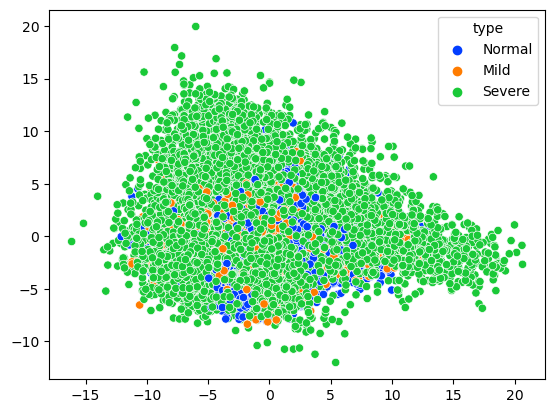

In [11]:
palette = sns.color_palette("bright", 3)
sns.scatterplot(pca_x[:,0], pca_x[:,1], hue=label['type'],legend='full', palette=palette)
plt.show()

In [80]:
# t-SNE
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(x)

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
tsne_x = (X_tsne - x_min) / (x_max - x_min)  # 归一化
#tsen_x.shape

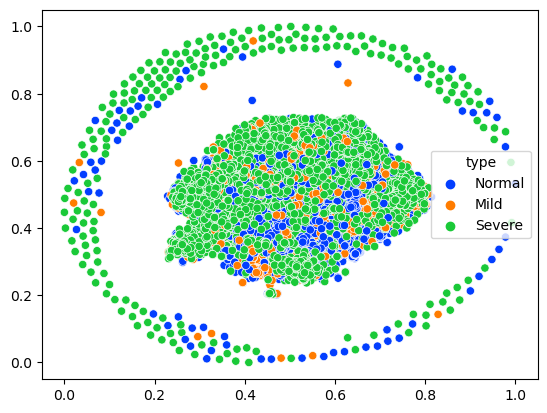

In [93]:
palette = sns.color_palette("bright", 3)

sns.scatterplot(tsne_x[:,0], tsne_x[:,1], hue=label['type'],legend='full', palette=palette)
plt.show()

In [48]:
# U-map 
reducer = umap.UMAP(n_neighbors= 15)
umap_x = reducer.fit_transform(x)
#umap_x.shape

C:\Users\Emma\anaconda3\envs\myhgt_py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


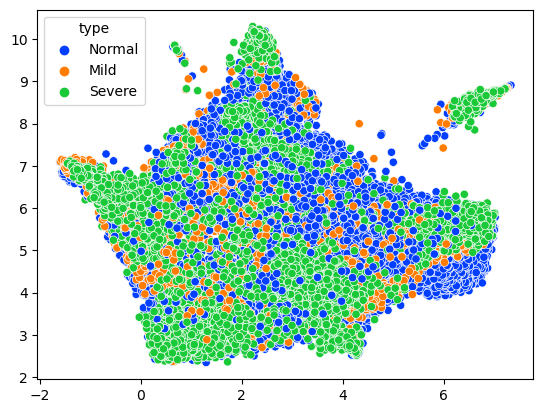

In [49]:
palette = sns.color_palette("bright", 3)
sns.scatterplot(umap_x[:,0], umap_x[:,1], hue=label['type'],legend='full', palette=palette)
plt.show()

# genecard summary embedding

In [13]:
genecard_summary = pd.read_csv('genecard_description_summary.csv',index_col=0,encoding = "ISO-8859-1")
genecard_summary[:5]

,type,description,summary_uniport,summary_entrez,summary_genecard,summary_Tocris,summary_CIViC
gene,,,,,,,
"""5-HT3C2""",Pseudogene,5-Hydroxytryptamine Receptor 3E Pseudogene,NaN,NaN,5-HT3C2 (5-Hydroxytryptamine Receptor 3E Pseud...,NaN,NaN
"""A1BG""",Protein Coding,Alpha-1-B Glycoprotein,NaN,The protein encoded by this gene is a plasma g...,A1BG (Alpha-1-B Glycoprotein) is a Protein Cod...,NaN,NaN
"""A1BG-AS1""",RNA Gene,A1BG Antisense RNA 1,NaN,NaN,A1BG-AS1 (A1BG Antisense RNA 1) is an RNA Gene...,NaN,NaN
"""A1CF""",Protein Coding,APOBEC1 Complementation Factor,"UniProtKB/Swiss-Prot for A1CF Gene A1CF_HUMAN,...",Mammalian apolipoprotein B mRNA undergoes site...,A1CF (APOBEC1 Complementation Factor) is a Pro...,NaN,NaN
"""A2M""",Protein Coding,Alpha-2-Macroglobulin,"UniProtKB/Swiss-Prot for A2M Gene A2MG_HUMAN,P...",The protein encoded by this gene is a protease...,A2M (Alpha-2-Macroglobulin) is a Protein Codin...,NaN,NaN


In [14]:
gene_list_from_scBALF=df.columns.tolist()
gene_list={}

#genecard_summary.loc['"A2M"']
for index, row in genecard_summary.iterrows():
    if index[1:-1] not in gene_list_from_scBALF:
        continue
    gene_list[index[1:-1]] = row

In [17]:
print(len(gene_list))
gene_list['A2M']

1721


type                                                   Protein Coding
description                                     Alpha-2-Macroglobulin
summary_uniport     UniProtKB/Swiss-Prot for A2M Gene A2MG_HUMAN,P...
summary_entrez      The protein encoded by this gene is a protease...
summary_genecard    A2M (Alpha-2-Macroglobulin) is a Protein Codin...
summary_Tocris                                                    NaN
summary_CIViC                                                     NaN
Name: "A2M", dtype: object